In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_ridge = pd.read_csv('Ordinal+Ridge.csv')
ordinal_ridge.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_ridge.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_ridge.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [9]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [10]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.930887,12390.896672
1,0.894349,12492.638160
2,0.940896,12487.243550
3,0.936195,12421.928488
4,0.945979,11527.656383
5,0.943960,11992.121699
6,0.895974,12201.362903
7,0.881523,13014.423522
8,0.933011,12929.832510
9,0.937185,12169.814486


In [11]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.928192,12137.794980
std,0.020362,499.274178
min,0.881140,10961.404294
25%,0.907671,11805.367504
50%,0.936948,12172.444746
75%,0.943213,12486.861037
max,0.959299,13261.176338


In [12]:
ord_ridge_drop1 = pd.read_csv('Ordinal+Ridge_Drop1.csv')
ord_ridge_drop1.shape

(2579, 84)

In [13]:
X_ord_drop1 = ord_ridge_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_ridge_drop1.SalePrice.values

In [14]:
X_ord_drop1.shape

(2579, 83)

In [15]:
len(Y_ord_drop1)

2579

In [16]:
X_ord_drop1.shape[1]

83

In [17]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [18]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.933778,12211.095161
1,0.932102,12369.578155
2,0.955346,10944.517200
3,0.933450,11556.460895
4,0.946313,11887.870264
5,0.939362,12147.235017
6,0.944269,11181.193060
7,0.954751,11763.492278
8,0.944731,11420.826302
9,0.935102,12415.626490


In [19]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.941563,11922.475430
std,0.006049,464.775268
min,0.928587,10929.465988
25%,0.937194,11575.838724
50%,0.942037,11892.139962
75%,0.945462,12235.700821
max,0.956704,13387.790207


In [20]:
ord_ridge_dropIF = pd.read_csv('Ordinal+Ridge_DropIF.csv')
ord_ridge_dropIF.shape

(2568, 84)

In [21]:
X3 = ord_ridge_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_ridge_dropIF.SalePrice.values

In [22]:
X3.shape

(2568, 83)

In [23]:
len(Y3)

2568

In [24]:
X3.shape[1]

83

In [25]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [26]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.941921,12059.905210
1,0.938055,11860.202681
2,0.947787,11913.485592
3,0.948077,11871.731138
4,0.945212,12099.565110
5,0.943077,11051.654041
6,0.953066,11363.635970
7,0.937256,11329.410613
8,0.942847,10834.519592
9,0.949184,11772.500450


In [27]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.942856,11693.589863
std,0.005919,404.183924
min,0.923650,10806.494463
25%,0.938461,11436.018372
50%,0.942990,11716.117169
75%,0.947312,11990.915975
max,0.953131,12928.985093


In [28]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.930887,12390.896672,0.933778,12211.095161,0.941921,12059.905210
1,0.894349,12492.638160,0.932102,12369.578155,0.938055,11860.202681
2,0.940896,12487.243550,0.955346,10944.517200,0.947787,11913.485592
3,0.936195,12421.928488,0.933450,11556.460895,0.948077,11871.731138
4,0.945979,11527.656383,0.946313,11887.870264,0.945212,12099.565110
5,0.943960,11992.121699,0.939362,12147.235017,0.943077,11051.654041
6,0.895974,12201.362903,0.944269,11181.193060,0.953066,11363.635970
7,0.881523,13014.423522,0.954751,11763.492278,0.937256,11329.410613
8,0.933011,12929.832510,0.944731,11420.826302,0.942847,10834.519592
9,0.937185,12169.814486,0.935102,12415.626490,0.949184,11772.500450


In [29]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.928192,12137.794980,0.941563,11922.475430,0.942856,11693.589863
std,0.020362,499.274178,0.006049,464.775268,0.005919,404.183924
min,0.881140,10961.404294,0.928587,10929.465988,0.923650,10806.494463
25%,0.907671,11805.367504,0.937194,11575.838724,0.938461,11436.018372
50%,0.936948,12172.444746,0.942037,11892.139962,0.942990,11716.117169
75%,0.943213,12486.861037,0.945462,12235.700821,0.947312,11990.915975
max,0.959299,13261.176338,0.956704,13387.790207,0.953131,12928.985093


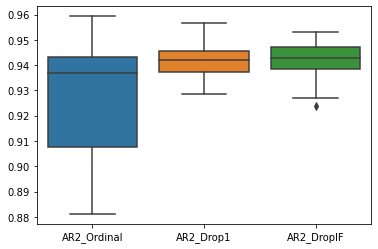

In [30]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

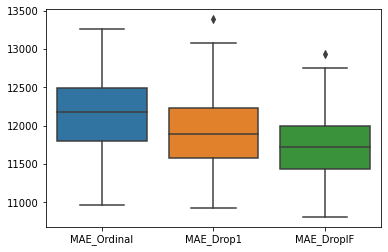

In [31]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);